In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Prime_heritage.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.describe(include='O')


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
num_cols=df.select_dtypes(include='number')
num_cols.corr

<bound method DataFrame.corr of       age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]>

In [9]:
num_cols_corr=num_cols.corr()


<Axes: >

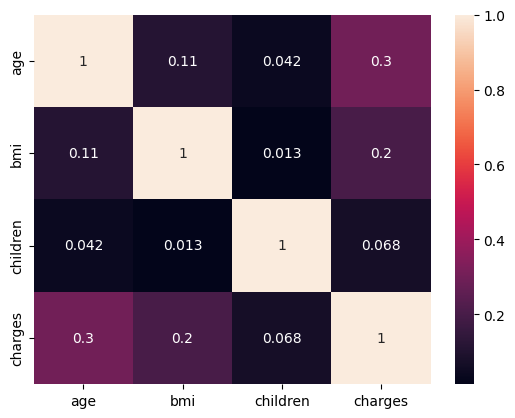

In [10]:
sns.heatmap(data=num_cols_corr, annot=True)

In [11]:
cat_cols=df.select_dtypes(include='O')
cat_cols.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [12]:
for col in cat_cols:
    print(cat_cols[col].nunique())
    print(cat_cols[col].unique())
    print(cat_cols[col].value_counts())
    print('*'*50)


2
['female' 'male']
sex
male      676
female    662
Name: count, dtype: int64
**************************************************
2
['yes' 'no']
smoker
no     1064
yes     274
Name: count, dtype: int64
**************************************************
4
['southwest' 'southeast' 'northwest' 'northeast']
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
**************************************************


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
x=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

y=df['charges']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [17]:
x_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [18]:
num_features=['age','bmi','children']
cat_features=['sex','smoker','region']
one_hot=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
scaler=StandardScaler()


In [19]:
preprocessor=ColumnTransformer(transformers=[
    ('categorical Pipeline',Pipeline(steps=[
        ('one_hot',one_hot)
    ]),cat_features),
    ('Numerical Pipeline',Pipeline(steps=[
        ('Scaler',scaler)
    ]),num_features)
])
preprocessor

ColumnTransformer(transformers=[('categorical Pipeline',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex', 'smoker', 'region']),
                                ('Numerical Pipeline',
                                 Pipeline(steps=[('Scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children'])])

In [20]:
preprocessor.fit_transform(x_train)

array([[ 1.        ,  0.        ,  1.        , ...,  1.54446486,
         0.10318223, -0.91501097],
       [ 0.        ,  1.        ,  1.        , ...,  0.48187425,
        -0.4908445 , -0.91501097],
       [ 1.        ,  0.        ,  1.        , ...,  1.04858924,
         0.2266597 ,  1.56027883],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  1.33194673,
        -0.8954835 , -0.91501097],
       [ 1.        ,  0.        ,  0.        , ..., -0.15568012,
         2.84638435,  0.73518223],
       [ 0.        ,  1.        ,  1.        , ...,  1.11942861,
        -0.10706319, -0.91501097]], shape=(936, 11))

In [21]:
pipeline_linearRegression=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])
pipeline_linearRegression

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical Pipeline',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker', 'region']),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', LinearRegression())])

In [22]:
pipeline_linearRegression.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical Pipeline',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker', 'region']),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', LinearRegression())])

In [23]:
y_pred=pipeline_linearRegression.predict(x_test)
y_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

In [24]:
print(r2_score(y_test,y_pred))

0.769611805436901


In [25]:
print(r2_score(y_pred,y_test))


0.694295280619887


In [26]:
mean_squared_error(y_test,y_pred)


33780509.574791655

In [34]:
df['id'] = df.index
df.head()

,age,sex,bmi,children,smoker,region,charges,id
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,northwest,3866.85520,4


In [49]:
df['age_cut']=pd.qcut(df['age'],10)
age=df.groupby(['age_cut'],observed=True,as_index=False)['id'].count()
age

,age_cut,id
0,"(17.999, 19.0]",137
1,"(19.0, 24.0]",141
2,"(24.0, 29.0]",139
3,"(29.0, 34.0]",132
4,"(34.0, 39.0]",125
5,"(39.0, 44.0]",135
6,"(44.0, 49.0]",144
7,"(49.0, 54.0]",143
8,"(54.0, 59.0]",128
9,"(59.0, 64.0]",114


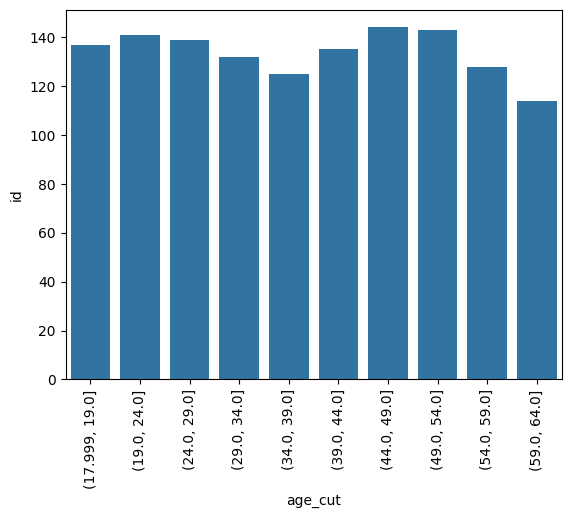

In [36]:
sns.barplot(data=age, x='age_cut',y='id')
plt.xticks(rotation=90)
plt.show()

In [38]:
np.sort(df['bmi'].unique())

array([15.96 , 16.815, 17.195, 17.29 , 17.385, 17.4  , 17.48 , 17.67 ,
       17.765, 17.8  , 17.86 , 17.955, 18.05 , 18.3  , 18.335, 18.5  ,
       18.6  , 18.715, 18.905, 19.   , 19.095, 19.19 , 19.3  , 19.475,
       19.57 , 19.8  , 19.855, 19.95 , 20.045, 20.1  , 20.13 , 20.235,
       20.3  , 20.35 , 20.4  , 20.425, 20.52 , 20.6  , 20.615, 20.7  ,
       20.79 , 20.8  , 20.9  , 21.01 , 21.09 , 21.12 , 21.28 , 21.3  ,
       21.375, 21.4  , 21.47 , 21.5  , 21.56 , 21.565, 21.66 , 21.7  ,
       21.755, 21.78 , 21.8  , 21.85 , 21.89 , 21.945, 22.   , 22.04 ,
       22.1  , 22.135, 22.22 , 22.23 , 22.3  , 22.42 , 22.515, 22.6  ,
       22.61 , 22.705, 22.77 , 22.8  , 22.88 , 22.895, 22.99 , 23.   ,
       23.085, 23.1  , 23.18 , 23.2  , 23.21 , 23.275, 23.3  , 23.32 ,
       23.37 , 23.4  , 23.465, 23.54 , 23.56 , 23.6  , 23.65 , 23.655,
       23.7  , 23.75 , 23.76 , 23.8  , 23.845, 23.87 , 23.9  , 23.94 ,
       23.98 , 24.035, 24.09 , 24.1  , 24.13 , 24.225, 24.3  , 24.31 ,
      

In [39]:
def bmi(bmi_score):
    if bmi_score < 18.5:
        return 'Underweight'
    elif bmi_score >= 18.5 and bmi_score <= 24.9:
        return 'Normal Weight'
    elif bmi_score >= 25 and bmi_score <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

In [40]:
df['Bmi Category']=df['bmi'].apply(bmi)

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges,id,age_cut,Bmi Category
0,19,female,27.900,0,yes,southwest,16884.92400,0,"(17.999, 19.0]",Overweight
1,18,male,33.770,1,no,southeast,1725.55230,1,"(17.999, 19.0]",Obese
2,28,male,33.000,3,no,southeast,4449.46200,2,"(24.0, 29.0]",Obese
3,33,male,22.705,0,no,northwest,21984.47061,3,"(29.0, 34.0]",Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,4,"(29.0, 34.0]",Overweight


In [43]:
df.groupby(['Bmi Category'],as_index=False)['id'].count()

,Bmi Category,id
0,Normal Weight,222
1,Obese,719
2,Overweight,377
3,Underweight,20


In [48]:
# gender_bmi=pd.crosstab(df['Bmi Category'],df['sex'])
gender_bmi=pd.crosstab(index=df['Bmi Category'],columns=[df['sex'],df['children']])

gender_bmi

# Checking the number of males and females who fall within each bmi category

sex           female                   male                  
children           0   1   2   3  4  5    0   1   2   3  4  5
Bmi Category                                                 
Normal Weight     48  28  22  16  0  2   49  20  20  13  1  3
Obese            147  75  69  43  5  4  158  91  71  46  7  3
Overweight        89  53  24  18  6  1   74  53  28  21  6  4
Underweight        5   2   4   0  0  1    4   2   2   0  0  0